In [1]:
import skvideo.io  
import numpy as np
import matplotlib.pyplot as plt
videodata = skvideo.io.vread("Pendulum_1_removed.mp4", as_grey=True)  
print(videodata.shape)
videodata = videodata.reshape(410, 1080, 960)
videodata = 256 - videodata
videodata = videodata / 256
print(videodata.shape)

(410, 1080, 960, 1)
(410, 1080, 960)


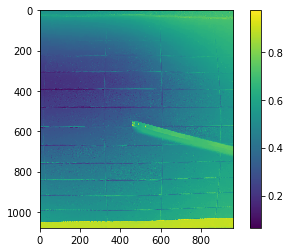

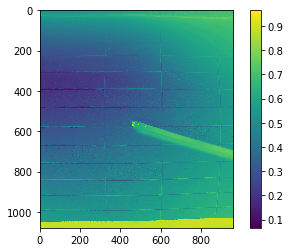

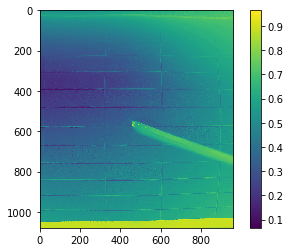

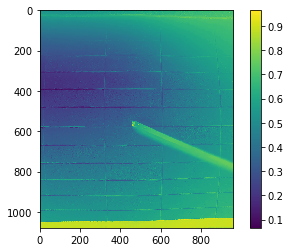

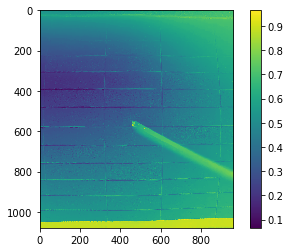

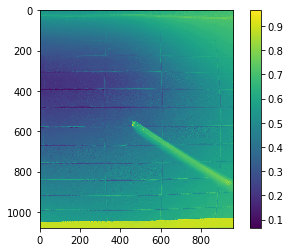

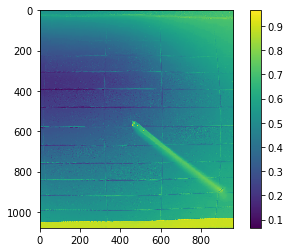

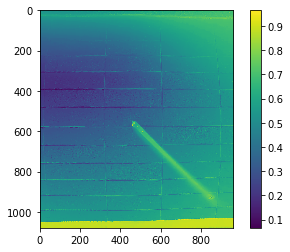

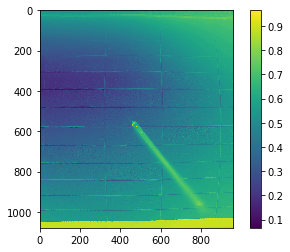

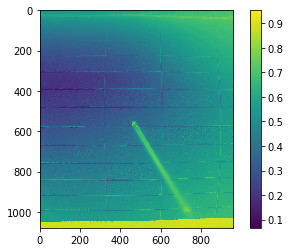

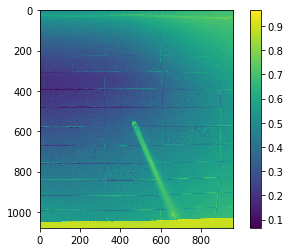

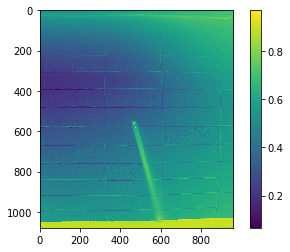

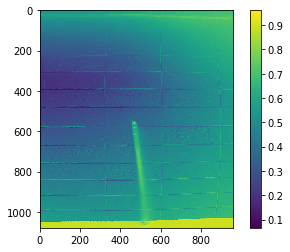

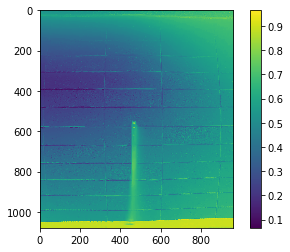

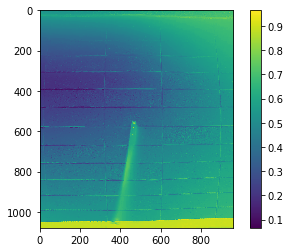

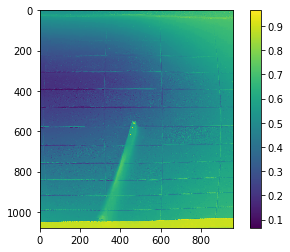

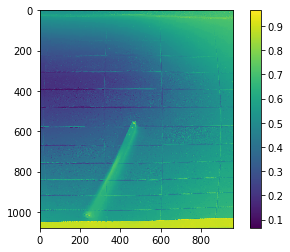

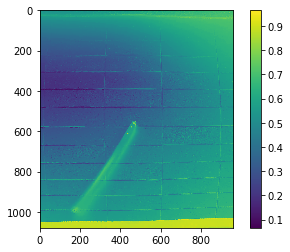

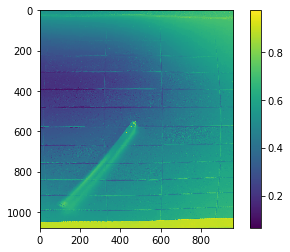

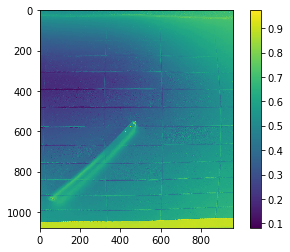

In [2]:
for i in range(20):
    img = videodata[i]
    plt.imshow(img, interpolation='nearest')
    plt.colorbar()
    plt.show()

In [3]:
print("BACKGROUND REMOVAL...")
average_frame1 = np.zeros_like(videodata[0])*1.0
for i in range(0, len(videodata)):
    average_frame1 += videodata[i]*1.0/len(videodata)

BACKGROUND REMOVAL...


In [4]:
videodata_new = np.zeros_like(videodata)
for i in range(0, len(videodata)):
    videodata_new[i] = videodata[i] - average_frame1

In [5]:
videodata_new[videodata_new<0.05] = 0
for i in range(len(videodata_new)):
    videodata_new[i] /= np.max(videodata_new[i])

In [7]:
from scipy.ndimage.filters import gaussian_filter
videodata_gaussian = np.zeros((len(videodata_new), 1080, 960))
for i in range(len(videodata_new)):
    image_frame = np.pad(videodata_new[i], ((20,20), (20,20)), 'mean')
    image_frame_gaussian = gaussian_filter(image_frame, sigma=20.0)
    videodata_gaussian[i] = image_frame_gaussian[20:-20, 20:-20]

In [8]:
# normalize
for i in range(len(videodata_new)):
    videodata_gaussian[i] /= np.max(videodata_gaussian[i])

In [9]:
import cv2
print("DOWNSAMPLING...")
videodata_pooling = np.zeros((len(videodata), 27, 24))
for i in range(len(videodata)):
    videodata_pooling[i] = cv2.resize(videodata_gaussian[i], dsize=(24, 27), interpolation=cv2.INTER_NEAREST)
print("SAVE TO NUMPY...")
np.save("x_pendulum_raw.npy", videodata_pooling)

DOWNSAMPLING...
SAVE TO NUMPY...


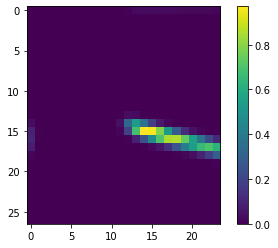

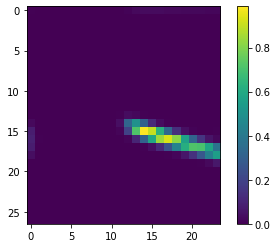

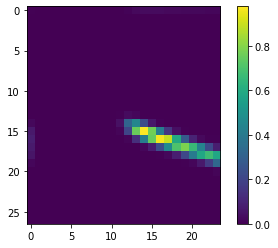

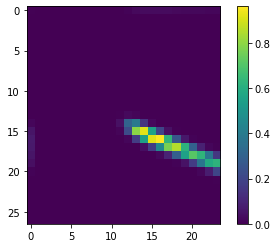

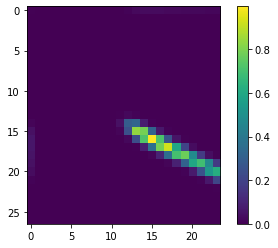

In [10]:
for i in range(5):
    img = videodata_pooling[i]
    plt.imshow(img, interpolation='nearest')
    plt.colorbar()
    plt.show()

In [12]:
print("TEMPORAL DERIVATIVE CALCULATION...")
dt = 1/29.97002997002997
videodata_dx = np.zeros((len(videodata_new), 27, 24))
for i in range(videodata_dx.shape[0]-1):
    videodata_dx[i] = (videodata_pooling[i+1] - videodata_pooling[i])/dt

TEMPORAL DERIVATIVE CALCULATION...


In [13]:
dt = 1/29.97002997002997
videodata_ddx = np.zeros((len(videodata_new), 27, 24))
for i in range(1, videodata_ddx.shape[0]-1):
    videodata_ddx[i] = ((videodata_pooling[i+1]-videodata_pooling[i])/dt-(videodata_pooling[i]-videodata_pooling[i-1])/dt)/dt

In [14]:
videodata_gaussian = videodata_gaussian[1:-1]
videodata_dx = videodata_dx[1:-1]
videodata_ddx = videodata_ddx[1:-1]

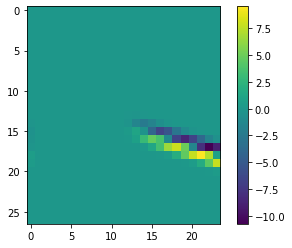

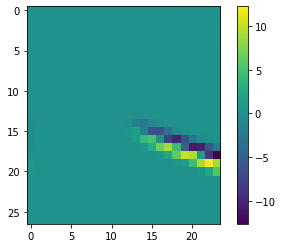

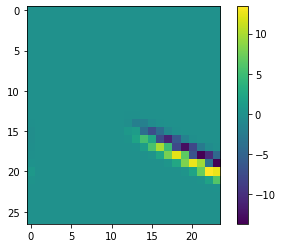

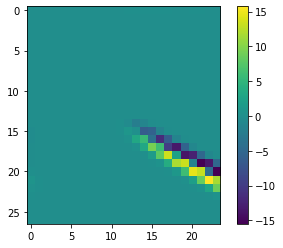

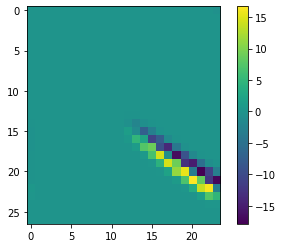

In [15]:
for i in range(5):
    img = videodata_dx[i]
    plt.imshow(img, interpolation='nearest')
    plt.colorbar()
    plt.show()

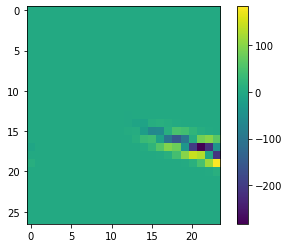

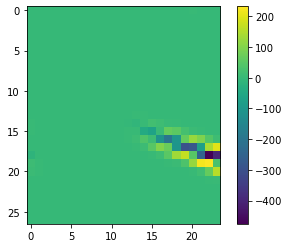

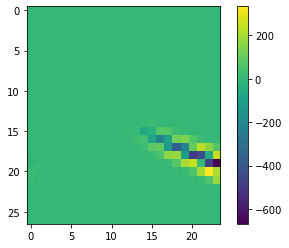

In [16]:
for i in range(3):
    img = videodata_ddx[i]
    plt.imshow(img, interpolation='nearest')
    plt.colorbar()
    plt.show()